In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Problem - 1**

## **Data Exploration and Understanding:**

**Dataset Overview:**
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.


In [4]:
df = pd.read_csv('/content/drive/MyDrive/WHR-2024-5CS037.csv')
print("First 10 rows of Dataset:\n")
pd.DataFrame(df)

First 10 rows of Dataset:



,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [5]:
#.shape[0] returns number of rows
total_rows = df.shape[0]
#.shape[1] returns number of columns
total_columns = df.shape[1]
print("Total number of rows",total_rows)
print("Total number of columns",total_columns)

Total number of rows 143
Total number of columns 9


In [6]:
# .dtypes returns series of columns as index and datatype of each column as value
col_with_dt = df.dtypes
print("Column with their data types:\n",col_with_dt)


Column with their data types:
 Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


**Basic Statistics:**
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [7]:
score_mean = df['score'].mean()
score_median = df['score'].median()
score_std = df['score'].std()
print("Mean of Score column:",score_mean)
print("Median of Score column:",score_median)
print("Standard Deviation of Score column:",score_std)

Mean of Score column: 5.52758041958042
Median of Score column: 5.785
Standard Deviation of Score column: 1.1707165099442995


In [8]:
# df['score'].max() returns maximum value and gets compared if true then filters its whole row
highest_score_row = df[df['score'] == df['score'].max()]
lowest_score_row = df[df['score'] == df['score'].min()]

# printing only the country name from the above data
print("Country with highest happiness score:",highest_score_row.iloc[0]['Country name'])
print("Country with lowest happiness score:",lowest_score_row.iloc[0]['Country name'])

Country with highest happiness score: Finland
Country with lowest happiness score: Afghanistan


**Missing Values:**
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [9]:
missing_values_in_dataset = df.isnull().sum()
print("Total count of missing values in each column:\n",missing_values_in_dataset)

Total count of missing values in each column:
 Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**Filtering and Sorting:**
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [10]:
filtered_df = df[df['score'] > 7.5]
width = 150
print("Filtered Dataset:\n".center(width))
filtered_df

                                                                  Filtered Dataset:
                                                                  


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [11]:
sorted_filtered_df = filtered_df.sort_values(by='Log GDP per capita',ascending=False)
width = 150
print("Sorted Filtered Dataset:\n".center(width))
sorted_filtered_df.head(10)

                                                              Sorted Filtered Dataset:
                                                               


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


**Adding New Columns:**
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [12]:
# defining conditions
conditions = [
    (df['score'] > 7.5),    # High category
    (df['score'] > 5.5) & (df['score'] <= 7.5),  # Medium category
    (df['score'] <= 5.5)    # Low category
]

# defining labels which will be the values to insert for each condition
categories = ['High', 'Medium', 'Low']

# checks which conditions is true and puts its corresponding values
df['Happiness Category'] = np.select(conditions, categories)

# new df with new column
print(df[['Country name', 'score', 'Happiness Category']].head(10))

  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344             Medium
4       Israel  7.341             Medium
5  Netherlands  7.319             Medium
6       Norway  7.302             Medium
7   Luxembourg  7.122             Medium
8  Switzerland  7.060             Medium
9    Australia  7.057             Medium


## **Data Visualizations:**

1. **Bar Plot**: Plot the top 10 happiest countries by Score using a bar chart.

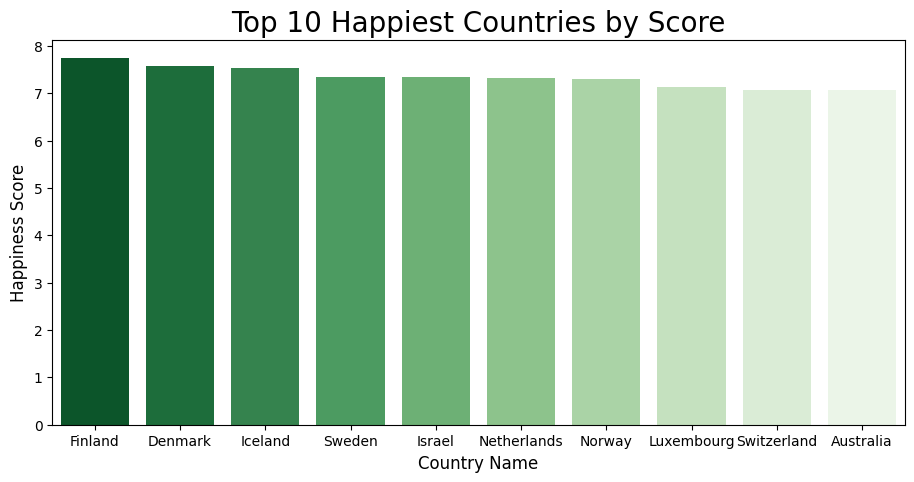

In [13]:
# sorting by score to pick top 10
sorted_by_score_df = df.sort_values(by='score', ascending=False)
# storing only 10 sorted values
top_10_happiest_country = sorted_by_score_df.head(10)

plt.figure(figsize=(11,5))
# hue='Country name' will treat each country as a separate category for coloring
# 'viridis' will apply color palette to the bars based on hue
sns.barplot( x='Country name',y='score',hue = 'Country name' ,data=top_10_happiest_country, palette='Greens_r')

plt.title('Top 10 Happiest Countries by Score', fontsize=20)
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Country Name', fontsize=12)
plt.show() # to display plot

2. **Line Plot**: Plot the top 10 unhappiest countries by Score using a Line chart.

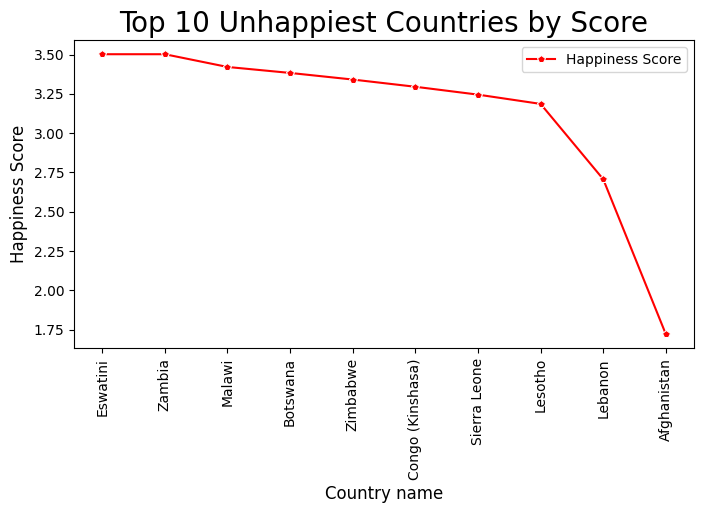

In [14]:
top_10_unhappiest_country = sorted_by_score_df.tail(10)

plt.figure(figsize=(8, 4))
sns.lineplot(x='Country name', y='score', data=top_10_unhappiest_country, marker='p', color='red', label='Happiness Score')

# Adding labels and title
plt.title('Top 10 Unhappiest Countries by Score', fontsize=20)
plt.xlabel('Country name', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

plt.xticks(rotation=90)

plt.show()

# eswatini and zambia have same score i.e 3.502 so they their markers have overlapped

3. **Histogram:** Plot a histogram for the Score column to show its distribution and also interpret.

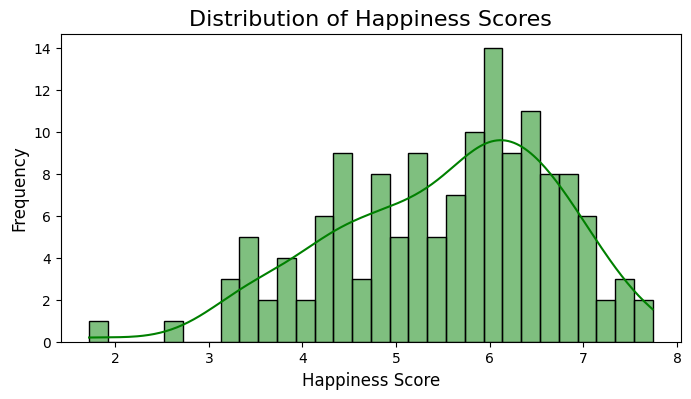

In [15]:
plt.figure(figsize=(8,4))
#kde=True: Kernel Density Estimate (KDE) curve on top of the histogram to show the probability distribution of the scores.
sns.histplot(df['score'], bins=30, kde=True, color='green')

# Adding labels and title
plt.title('Distribution of Happiness Scores', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


The majority of countries have medium happiness scores (between 4 and 6).
The distribution is bell shaped, suggesting that while most countries have moderate happiness, there are a few countries that are exceptionally happy and less happy (with high and low scores).
The outliers indicate a few countries with scores much higher than the rest, possibly representing countries with very high living standards, strong economies, or good social support.

4.**Scatter Plot:** Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

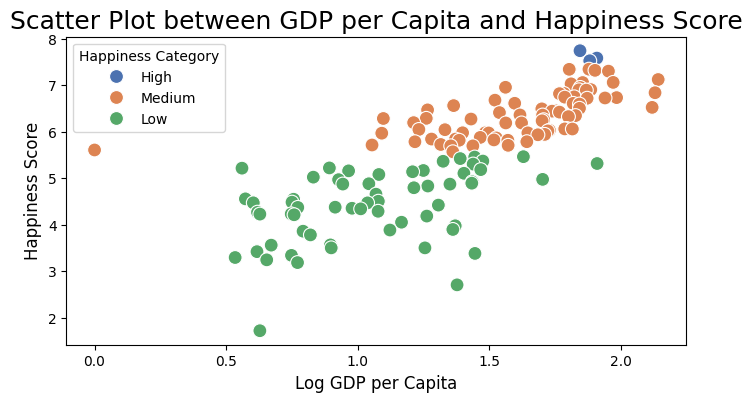

In [16]:
# Plotting the scatter plot between GDP per Capita and Score
plt.figure(figsize=(8,4))
sns.scatterplot(x='Log GDP per capita', y='score', data=df,hue='Happiness Category', palette='deep', s=100)

# Adding labels and title
plt.title('Scatter Plot between GDP per Capita and Happiness Score', fontsize=18)
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Show the plot
plt.show()

Positive Correlation: The points tend to rise together, meaning as the GDP per capita increases, the happiness score tends to increase as well.

# **Problem - 2**

## **Task - 1** - Setup Task - Preparing the South-Asia Dataset:

1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [17]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]

south_asia_filtered_df = df[df['Country name'].isin(south_asian_countries)]

# Save the filtered dataset to a new CSV file,, index chaindeina so false
south_asia_filtered_df.to_csv('south_asia_happiness_scores.csv', index=False)
print("south_asia_happiness_scores.csv saved!")

print(south_asia_filtered_df.head())

south_asia_happiness_scores.csv saved!
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783             

## **Task - 2** - Composite Score Ranking:

**Tasks:**
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

In [18]:
south_asia_df = pd.read_csv('/content/south_asia_happiness_scores.csv')


In [19]:
south_asia_df['Composite Score'] = (south_asia_df['Log GDP per capita']*0.40 + south_asia_df['Social support']*0.30+0.30* south_asia_df['Healthy life expectancy'])

sorted_south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)
print(sorted_south_asia_df[['Country name','score', 'Composite Score']].head())

  Country name  score  Composite Score
3    Sri Lanka  3.898           1.0739
0        Nepal  5.158           0.8159
2        India  4.054           0.7874
1     Pakistan  4.657           0.7039
4   Bangladesh  3.886           0.6774


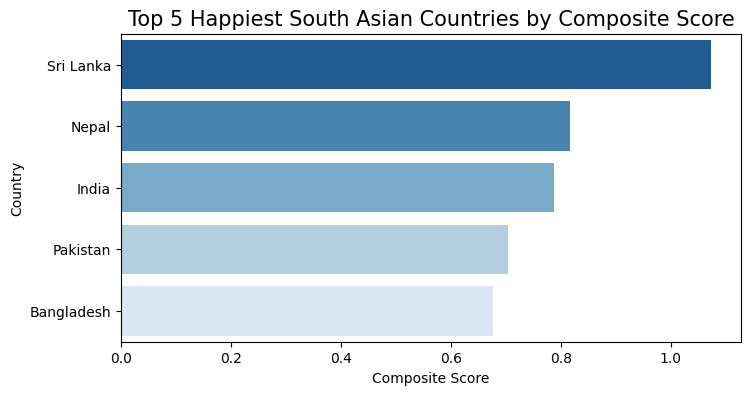

In [20]:
top_5_south_asian_countries = sorted_south_asia_df.head(5)

# Plotting the vertical bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='Composite Score', y='Country name', hue='Country name' ,data=top_5_south_asian_countries, palette='Blues_r')

# Adding labels and title
plt.title('Top 5 Happiest South Asian Countries by Composite Score', fontsize=15)
plt.xlabel('Composite Score')
plt.ylabel('Country')

plt.show()

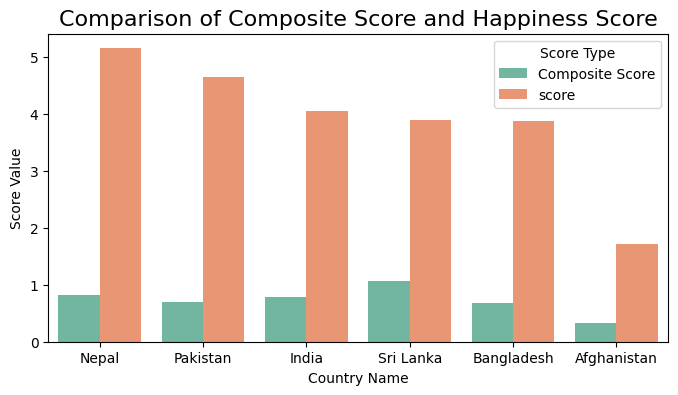

In [21]:
south_asia_countries = south_asia_df.head(10)

south_asia_countries_melted = pd.melt(south_asia_countries, id_vars=['Country name'],
                                  value_vars=['Composite Score', 'score'],
                                  var_name='Score Type', value_name='Score Value')

# Plotting with Seaborn's barplot
plt.figure(figsize=(8, 4))
sns.barplot(x='Country name', y='Score Value', hue='Score Type', data=south_asia_countries_melted,palette='Set2')

plt.title('Comparison of Composite Score and Happiness Score', fontsize=16)
plt.xlabel('Country Name')
plt.ylabel('Score Value')

plt.show()

## Task - 3 - Outlier Detection:

**Tasks:**
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [22]:
# Calculate IQR for 'score'
q1_score = south_asia_df['score'].quantile(0.25)
q3_score = south_asia_df['score'].quantile(0.75)
iqr_score = q3_score - q1_score

# Calculate IQR for 'Log GDP per capita'
q1_gdp = south_asia_df['Log GDP per capita'].quantile(0.25)
q3_gdp = south_asia_df['Log GDP per capita'].quantile(0.75)
iqr_gdp = q3_gdp - q1_gdp

# Identify outliers in Score
score_outliers = south_asia_df[
    (south_asia_df['score'] < q1_score - 1.5 * iqr_score) |
    (south_asia_df['score'] > q3_score + 1.5 * iqr_score)
]

# Identify outliers in GDP
gdp_outliers = south_asia_df[
    (south_asia_df['Log GDP per capita'] < q1_gdp - 1.5 * iqr_gdp) |
    (south_asia_df['Log GDP per capita'] > q3_gdp + 1.5 * iqr_gdp)
]

# Combine outliers
combined_outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# Display the combined outliers
print("Outlier Countries Based on Score and GDP per Capita:\n")
print(combined_outliers[['Country name', 'score', 'Log GDP per capita']])

Outlier Countries Based on Score and GDP per Capita:

  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628


Steps to Define Outliers Using the 1.5 × IQR Rule:
Calculate the Quartiles:

𝑄
1
Q1: The 25th percentile (lower quartile).
𝑄
3
Q3: The 75th percentile (upper quartile).
Calculate the Interquartile Range (IQR):

IQR
=
𝑄
3
−
𝑄
1
IQR=Q3−Q1
Define Outlier Bounds:

Lower Bound:
𝑄
1
−
1.5
×
IQR
Q1−1.5×IQR
Upper Bound:
𝑄
3
+
1.5
×
IQR
Q3+1.5×IQR
Flag Outliers:

Values below the lower bound or above the upper bound are considered outliers.

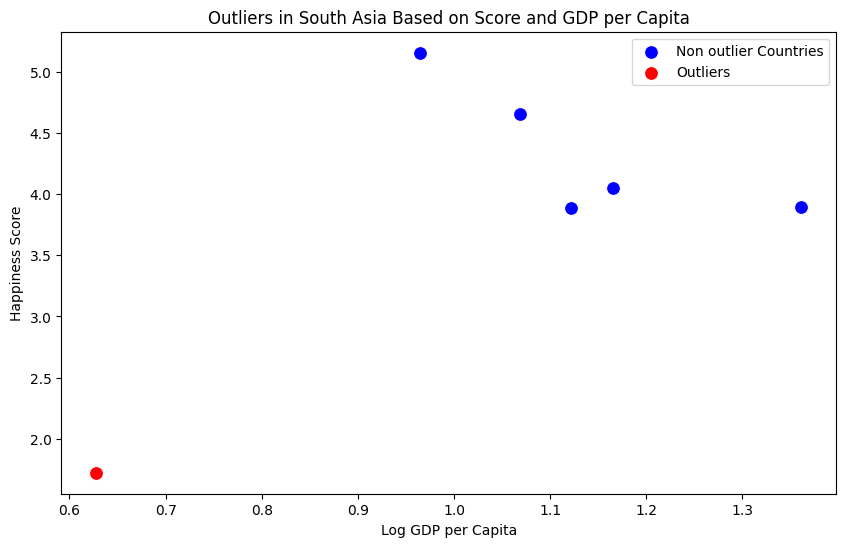

In [23]:

# Visualize outliers using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Log GDP per capita', y='score',
    data=south_asia_df,
    color='blue', label='Non outlier Countries',s=100
)
sns.scatterplot(
    x='Log GDP per capita', y='score',
    data=combined_outliers,
    color='red', label='Outliers', s=100
)

# Add labels and title
plt.title('Outliers in South Asia Based on Score and GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

## **Task - 4 - Exploring Trends Across Metrics:**

**Tasks:**
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [24]:
# Calculate Pearson correlation for selected metrics
freedom_corr = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
generosity_corr = south_asia_df['Generosity'].corr(south_asia_df['score'])

# Display correlations
print(f"Correlation between Freedom to Make Life Choices and Score: {freedom_corr:.2f}")
print(f"Correlation between Generosity and Score: {generosity_corr:.2f}")


Correlation between Freedom to Make Life Choices and Score: 0.80
Correlation between Generosity and Score: 0.87


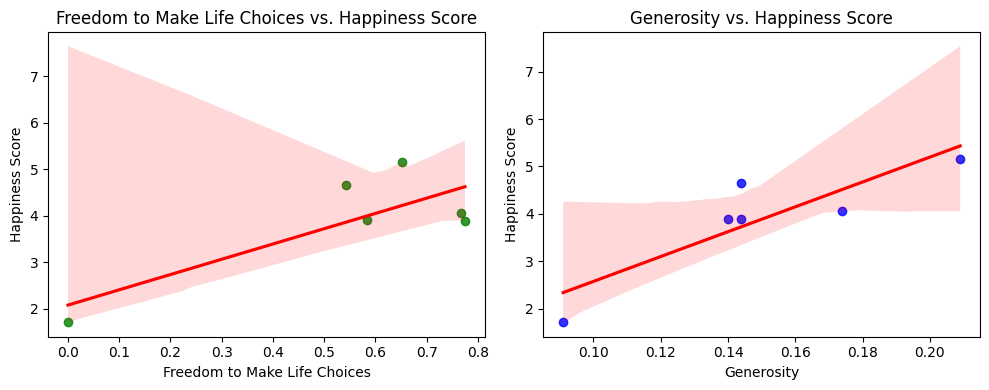

In [25]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Freedom to Make Life Choices vs. Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

# Scatter plot with regression line for Generosity vs. Score
plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asia_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Generosity vs. Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

plt.tight_layout()
plt.show()


## **Task - 5 - Gap Analysis:**

**Tasks:**
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

In [26]:
# Calculate GDP-Score Gap
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Display the updated DataFrame
south_asia_df[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']]


,Country name,Log GDP per capita,score,GDP-Score Gap
0,Nepal,0.965,5.158,-4.193
1,Pakistan,1.069,4.657,-3.588
2,India,1.166,4.054,-2.888
3,Sri Lanka,1.361,3.898,-2.537
4,Bangladesh,1.122,3.886,-2.764
5,Afghanistan,0.628,1.721,-1.093


In [27]:
# Sort countries by GDP-Score Gap in ascending order
ascending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)

# Sort countries by GDP-Score Gap in descending order
descending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

# Display top 3 positive and negative gaps
top_positive_gaps = descending_gap.head(3)
top_negative_gaps = ascending_gap.head(3)

print("Top 3 Positive Gaps:")
print(top_positive_gaps[['Country name', 'GDP-Score Gap']])

print("\nTop 3 Negative Gaps:")
print(top_negative_gaps[['Country name', 'GDP-Score Gap']])


Top 3 Positive Gaps:
  Country name  GDP-Score Gap
5  Afghanistan         -1.093
3    Sri Lanka         -2.537
4   Bangladesh         -2.764

Top 3 Negative Gaps:
  Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888


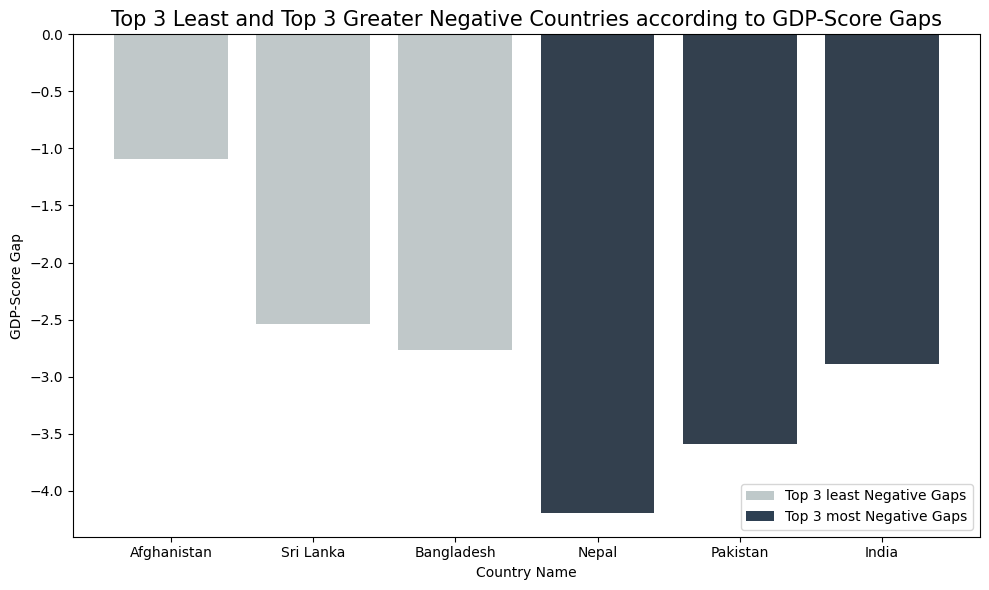

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine top 3 positive and negative gaps
top_gap_countries = pd.concat([top_positive_gaps, top_negative_gaps])
color_list = ['#bfc9ca'] * 3 + ['#2e4053'] *  3
# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Country name',
    y='GDP-Score Gap',
    hue='Country name',
    data=top_gap_countries,
    palette=color_list,
    order=top_gap_countries['Country name']
)
plt.title('Top 3 Least and Top 3 Greater Negative Countries according to GDP-Score Gaps', fontsize=15)
plt.xlabel('Country Name')
plt.ylabel('GDP-Score Gap')
# Manually add legend labels
plt.bar(0, 0, color='#bfc9ca', label='Top 3 least Negative Gaps')
plt.bar(0, 0, color='#2e4053', label='Top 3 most Negative Gaps')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


# **Problem - 3 - Comparative Analysis:**

In [29]:
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]
filtered_middle_east_df = df[df['Country name'].isin(middle_east_countries)]

# Display the Middle Eastern DataFrame
print("Middle Eastern Countries DataFrame:")
filtered_middle_east_df

Middle Eastern Countries DataFrame:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,Medium
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,Medium
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,Medium
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,Medium
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Low
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Low
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Low
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


**Descriptive Statistics:**
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [30]:
# Calculate mean and standard deviation for South Asia
south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()

# Calculate mean and standard deviation for Middle East
middle_east_mean = filtered_middle_east_df['score'].mean()
middle_east_std = filtered_middle_east_df['score'].std()

# Display results
print(f"South Asia - Mean: {south_asia_mean:.2f}, Standard Deviation: {south_asia_std:.2f}")
print(f"Middle East - Mean: {middle_east_mean:.2f}, Standard Deviation: {middle_east_std:.2f}")


South Asia - Mean: 3.90, Standard Deviation: 1.18
Middle East - Mean: 5.41, Standard Deviation: 1.57


In [31]:
if middle_east_mean > south_asia_mean:
    print("Middle East has higher happiness scores on average.")
else:
    print("South Asia has higher happiness scores on average.")



Middle East has higher happiness scores on average.


**Top and Bottom Performers:**
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.

In [32]:
# Top and Bottom 3 for South Asia
top_3_south_asia = south_asia_df.nlargest(3, 'score')
bottom_3_south_asia = south_asia_df.nsmallest(3, 'score')

# Top and Bottom 3 for Middle East
top_3_middle_east = filtered_middle_east_df.nlargest(3, 'score')
bottom_3_middle_east = filtered_middle_east_df.nsmallest(3, 'score')

# Display Results
print("Top 3 South Asian Countries by Score:")
print(top_3_south_asia[['Country name', 'score']])

print("\nBottom 3 South Asian Countries by Score:")
print(bottom_3_south_asia[['Country name', 'score']])

print("\nTop 3 Middle Eastern Countries by Score:")
print(top_3_middle_east[['Country name', 'score']])

print("\nBottom 3 Middle Eastern Countries by Score:")
print(bottom_3_middle_east[['Country name', 'score']])


Top 3 South Asian Countries by Score:
  Country name  score
0        Nepal  5.158
1     Pakistan  4.657
2        India  4.054

Bottom 3 South Asian Countries by Score:
  Country name  score
5  Afghanistan  1.721
4   Bangladesh  3.886
3    Sri Lanka  3.898

Top 3 Middle Eastern Countries by Score:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Middle Eastern Countries by Score:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


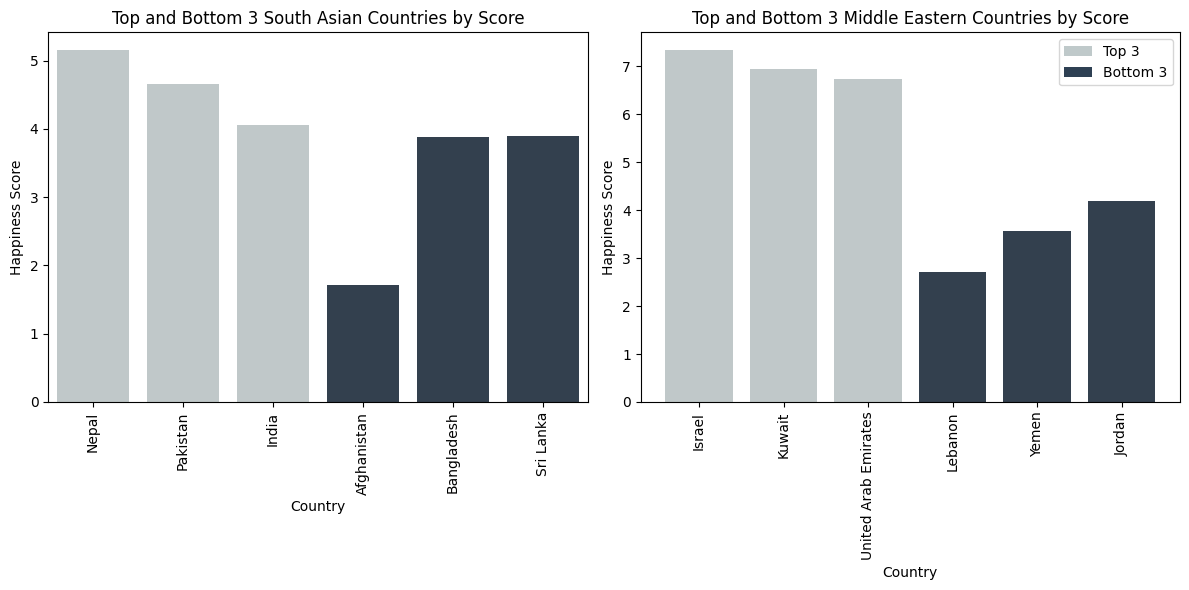

In [33]:
# Combine the top 3 and bottom 3 for South Asia
south_asia_combined = pd.concat([top_3_south_asia, bottom_3_south_asia])

# Combine the top 3 and bottom 3 for Middle East
middle_east_combined = pd.concat([top_3_middle_east, bottom_3_middle_east])

# Define colors for the top 3 and bottom 3
top_color = '#bfc9ca'  # Blue color for top 3
bottom_color = '#2e4053'  # Orange color for bottom 3
color = [top_color] * 3 + [bottom_color] * 3
# Plot bar charts for South Asia
plt.figure(figsize=(12, 6))

# South Asia chart
plt.subplot(1, 2, 1)
sns.barplot(x='Country name', y='score', data=south_asia_combined,hue='Country name',
            palette=color)
plt.title('Top and Bottom 3 South Asian Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)

# Plot bar charts for Middle East
# Middle East chart
plt.subplot(1, 2, 2)
sns.barplot(x='Country name', y='score', data=middle_east_combined,hue='Country name',
            palette=color)
plt.title('Top and Bottom 3 Middle Eastern Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)

# Manually add legend labels
plt.bar(0, 0, color='#bfc9ca', label='Top 3')
plt.bar(0, 0, color='#2e4053', label='Bottom 3')
plt.legend(loc='upper right')

# Show plots
plt.tight_layout()
plt.show()



**Metric Comparisons:**

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

In [34]:
# Metrics to compare
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Compute averages for South Asia and Middle East
south_asia_averages = south_asia_df[metrics].mean()
middle_east_averages = filtered_middle_east_df[metrics].mean()

# Combine into a DataFrame for visualization
region_comparison_df = pd.DataFrame({
    'Metric': metrics,
    'South Asia': south_asia_averages.values,
    'Middle East': middle_east_averages.values
})

# Reshape for grouped bar chart
region_comparison_df = region_comparison_df.melt(
    id_vars='Metric',
    var_name='Region',
    value_name='Average Value'
)


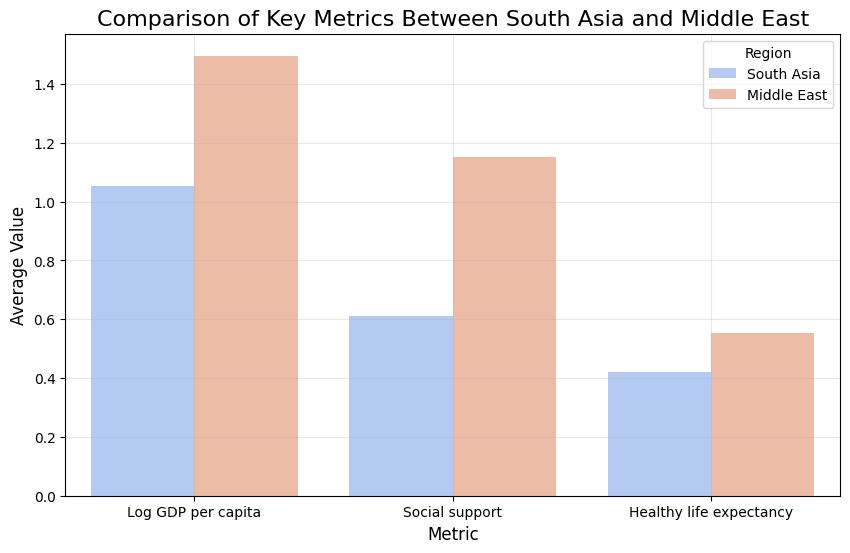

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Metric',
    y='Average Value',
    hue='Region',
    data=region_comparison_df,
    palette='coolwarm'
)

# Add labels and title
plt.title('Comparison of Key Metrics Between South Asia and Middle East', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(title='Region')
plt.grid(alpha=0.3)
plt.show()


In [36]:
# Calculate absolute differences between averages
disparity = abs(south_asia_averages - middle_east_averages)

# Find the metric with the largest disparity
largest_disparity_metric = disparity.idxmax()
largest_disparity_value = disparity.max()

print(f"The metric with the largest disparity is: {largest_disparity_metric} with a difference of {largest_disparity_value:.2f}")


The metric with the largest disparity is: Social support with a difference of 0.54


4. **Happiness Disparity:**

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [37]:
# Range (max - min) for South Asia
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()

# Range (max - min) for Middle East
middle_east_range = filtered_middle_east_df['score'].max() - filtered_middle_east_df['score'].min()

# Coefficient of Variation (CV) = Standard Deviation / Mean
south_asia_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()
middle_east_cv = filtered_middle_east_df['score'].std() / filtered_middle_east_df['score'].mean()

# Display results
print(f"South Asia - Range: {south_asia_range:.2f}, CV: {south_asia_cv:.2f}")
print(f"Middle East - Range: {middle_east_range:.2f}, CV: {middle_east_cv:.2f}")


South Asia - Range: 3.44, CV: 0.30
Middle East - Range: 4.63, CV: 0.29


In [38]:
# Determine the region with greater variability
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness (based on CV).")
elif middle_east_cv > south_asia_cv:
    print("Middle East has greater variability in happiness (based on CV).")
else:
    print("Both regions have similar variability in happiness.")


South Asia has greater variability in happiness (based on CV).


**Correlation Analysis:**

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

In [39]:
# Calculate the correlation of 'Score' with other metrics for South Asia
south_asia_corr_freedom = south_asia_df['score'].corr(south_asia_df['Freedom to make life choices'])
south_asia_corr_generosity = south_asia_df['score'].corr(south_asia_df['Generosity'])

# Calculate the correlation of 'Score' with other metrics for Middle East
middle_east_corr_freedom = filtered_middle_east_df['score'].corr(filtered_middle_east_df['Freedom to make life choices'])
middle_east_corr_generosity = filtered_middle_east_df['score'].corr(filtered_middle_east_df['Generosity'])

print(f"South Asia - Correlation with Freedom: {south_asia_corr_freedom:.2f}, Correlation with Generosity: {south_asia_corr_generosity:.2f}")
print(f"Middle East - Correlation with Freedom: {middle_east_corr_freedom:.2f}, Correlation with Generosity: {middle_east_corr_generosity:.2f}")


South Asia - Correlation with Freedom: 0.80, Correlation with Generosity: 0.87
Middle East - Correlation with Freedom: 0.86, Correlation with Generosity: 0.63


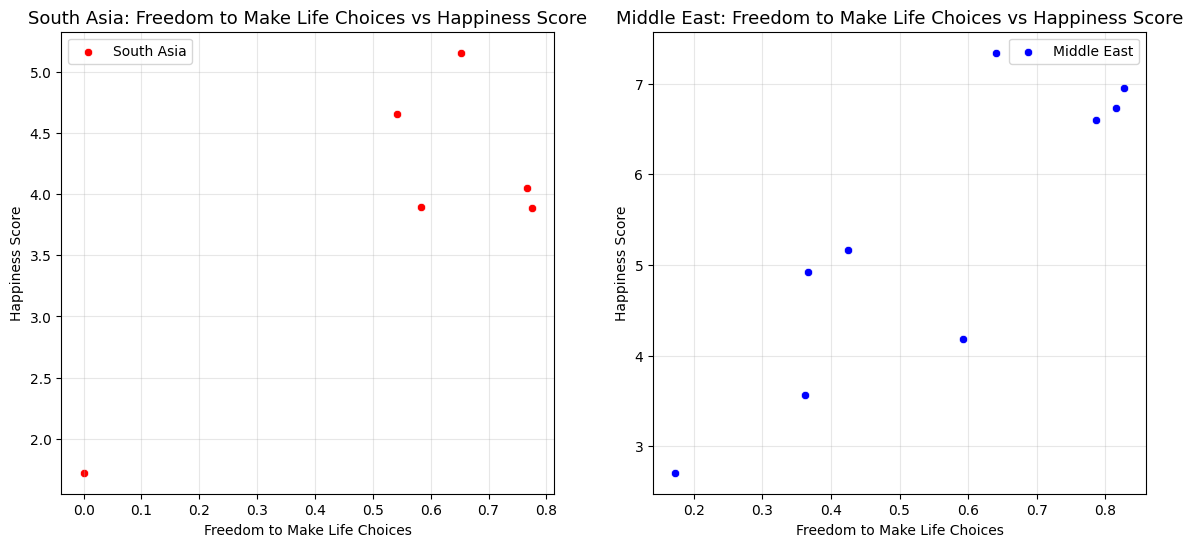

In [40]:

# Create the first figure with two subplots: South Asia and Middle East - Freedom to Make Life Choices
plt.figure(figsize=(14, 6))

# Scatter plot for South Asia: Freedom to Make Life Choices vs Score
plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asia_df, color='red', label='South Asia')
plt.title('South Asia: Freedom to Make Life Choices vs Happiness Score', fontsize=13)
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(alpha=0.3)

# Scatter plot for Middle East: Freedom to Make Life Choices vs Score
plt.subplot(1, 2, 2)
sns.scatterplot(x='Freedom to make life choices', y='score', data=filtered_middle_east_df, color='blue', label='Middle East')
plt.title('Middle East: Freedom to Make Life Choices vs Happiness Score', fontsize=13)
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(alpha=0.3)

# Adjust layout for the first figure

plt.show()





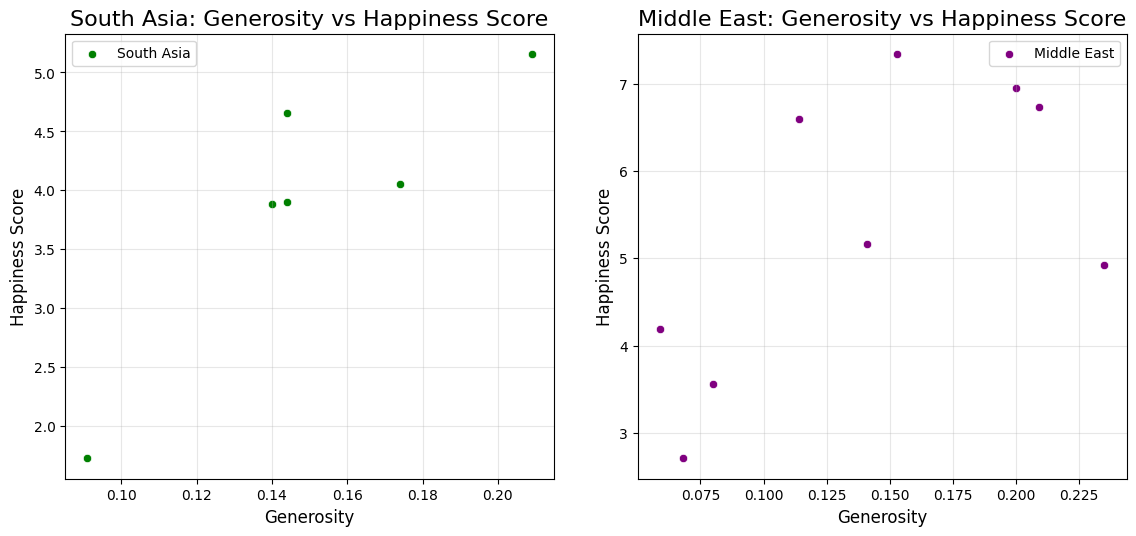

In [41]:
# Create the second figure with two subplots: South Asia and Middle East - Generosity
plt.figure(figsize=(12, 6))

# Scatter plot for South Asia: Generosity vs Score
plt.subplot(1, 2, 1)
sns.scatterplot(x='Generosity', y='score', data=south_asia_df, color='green', label='South Asia')
plt.title('South Asia: Generosity vs Happiness Score', fontsize=16)
plt.xlabel('Generosity', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Scatter plot for Middle East: Generosity vs Score
plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=filtered_middle_east_df, color='purple', label='Middle East')
plt.title('Middle East: Generosity vs Happiness Score', fontsize=16)
plt.xlabel('Generosity', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Adjust layout for the second figure
plt.tight_layout(pad=3)
plt.show()

**6. Outlier Detection:**

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

In [42]:

# Calculate IQR for Middle East region for Score and GDP per Capita
middle_east_iqr_score = filtered_middle_east_df['score'].quantile(0.75) - filtered_middle_east_df['score'].quantile(0.25)
middle_east_iqr_gdp = filtered_middle_east_df['Log GDP per capita'].quantile(0.75) - filtered_middle_east_df['Log GDP per capita'].quantile(0.25)

# Calculate Q1 and Q3 for both Score and GDP per Capita for Middle East
middle_east_q1_score = filtered_middle_east_df['score'].quantile(0.25)
middle_east_q3_score = filtered_middle_east_df['score'].quantile(0.75)
middle_east_q1_gdp = filtered_middle_east_df['Log GDP per capita'].quantile(0.25)
middle_east_q3_gdp = filtered_middle_east_df['Log GDP per capita'].quantile(0.75)

# Define outliers using 1.5 * IQR rule for Middle East
middle_east_outliers_score = (filtered_middle_east_df['score'] < (middle_east_q1_score - 1.5 * middle_east_iqr_score)) | \
                             (filtered_middle_east_df['score'] > (middle_east_q3_score + 1.5 * middle_east_iqr_score))
middle_east_outliers_gdp = (filtered_middle_east_df['Log GDP per capita'] < (middle_east_q1_gdp - 1.5 * middle_east_iqr_gdp)) | \
                           (filtered_middle_east_df['Log GDP per capita'] > (middle_east_q3_gdp + 1.5 * middle_east_iqr_gdp))

# Combine the outliers for Middle East
middle_east_outliers = filtered_middle_east_df[middle_east_outliers_score | middle_east_outliers_gdp]

Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual, Happiness Category]
Index: []


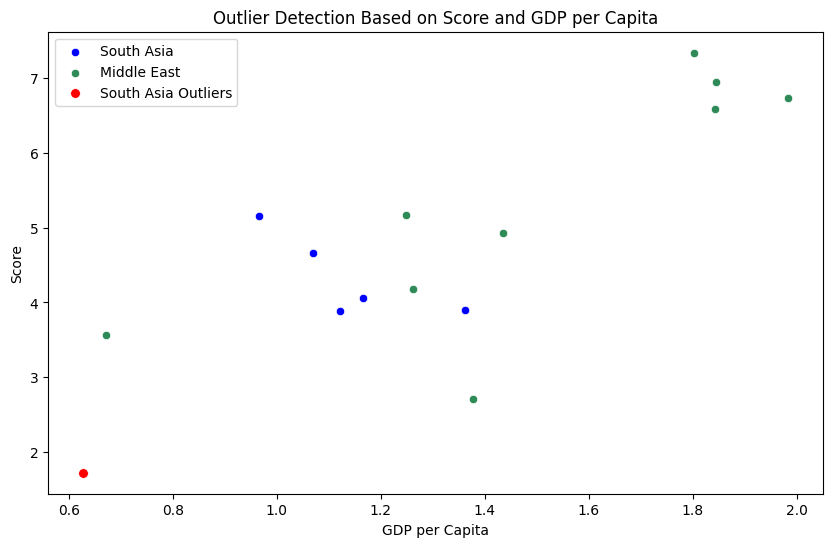

In [43]:

# Plot the outliers using scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, label='South Asia', color='blue')
sns.scatterplot(x='Log GDP per capita', y='score', data=filtered_middle_east_df, label='Middle East', color='seagreen')
sns.scatterplot(x='Log GDP per capita', y='score', data=combined_outliers, label='South Asia Outliers', color='red', marker='o', s=50)
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_outliers, label='Middle East Outliers', color='orange', marker='o', s=50)

plt.title('Outlier Detection Based on Score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.show()

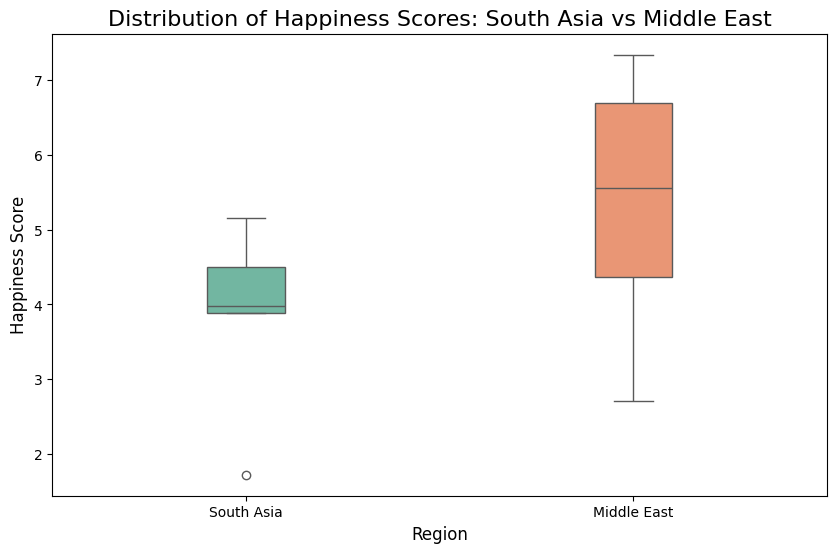

In [46]:
# Add a new column 'Region' to each DataFrame for easier comparison
south_asia_df['Region'] = 'South Asia'
filtered_middle_east_df.loc[:,'Region'] = 'Middle East'

# Combine the two datasets for comparison
combined_df = pd.concat([south_asia_df[['Country name', 'score', 'Region']],
                         filtered_middle_east_df[['Country name', 'score', 'Region']]])

# Create a boxplot to compare the Score distribution between South Asia and Middle East
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df, hue="Region",palette='Set2', width=0.2)

# Add titles and labels
plt.title('Distribution of Happiness Scores: South Asia vs Middle East', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)


plt.show()
